In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = "100"
lie_type = "attack_all_7000"

In [3]:
statuses = {0: "no endpoint blacklisted", 1: "one endpoint blacklisted", 2: "both endpoints blacklisted"}
colors = {"no endpoint blacklisted": "green", 
          "one endpoint blacklisted": "blue", 
          "both endpoints blacklisted": "red"}

In [4]:
data= pd.read_csv("data/percentage/test_"
                  +N+"_nodes_"+lie_type+".csv")[[
    "node_1","node_2","lie_percentage","nb_strikes_1","nb_strikes_2","threshold"]]

threshold = data["threshold"][0]

In [5]:
grouped = pd.DataFrame(data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)).reset_index()

lies_N = pd.DataFrame(grouped[grouped["node_1"] == "N5"]["lie_percentage"]).reset_index()["lie_percentage"][0]

print(list(pd.DataFrame(lies_N).sort_values(by=0)[0]))

[0.01, 0.11, 0.12, 0.26, 0.31, 0.31, 0.62, 0.66, 0.84, 0.93, 1.01, 1.04, 1.05, 1.09, 1.11, 1.3, 1.61, 1.73, 2.02, 2.07, 2.12, 2.14, 2.24, 2.36, 2.55, 2.57, 2.66, 2.7, 2.75, 2.81, 2.88, 2.95, 3.01, 3.08, 3.14, 3.2, 3.37, 3.39, 3.55, 3.71, 3.88, 3.94, 4.29, 4.39, 4.53, 4.55, 4.61, 4.62, 4.66, 4.81, 4.91, 5.35, 5.42, 5.48, 5.62, 5.63, 5.66, 5.68, 5.69, 5.81, 5.88, 6.24, 6.3, 6.44, 6.48, 6.54, 6.6, 6.61, 6.65, 6.87, 7.05, 7.07, 7.12, 7.13, 7.17, 7.24, 7.6, 7.6, 7.63, 7.73, 8.05, 8.27, 8.6, 8.86, 9.42, 9.45, 9.84, 9.9, 9.92, 9.97, 10.15, 10.28, 10.4, 10.62, 10.82, 10.9, 10.93, 11.17, 12.26]


In [6]:
nb_strikes = data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)\
    .reset_index()["nb_strikes_1"]


In [7]:
#data['strike_quartiles'] = pd.qcut(data['nb_strikes_1'], 5)

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


<Figure size 432x288 with 0 Axes>

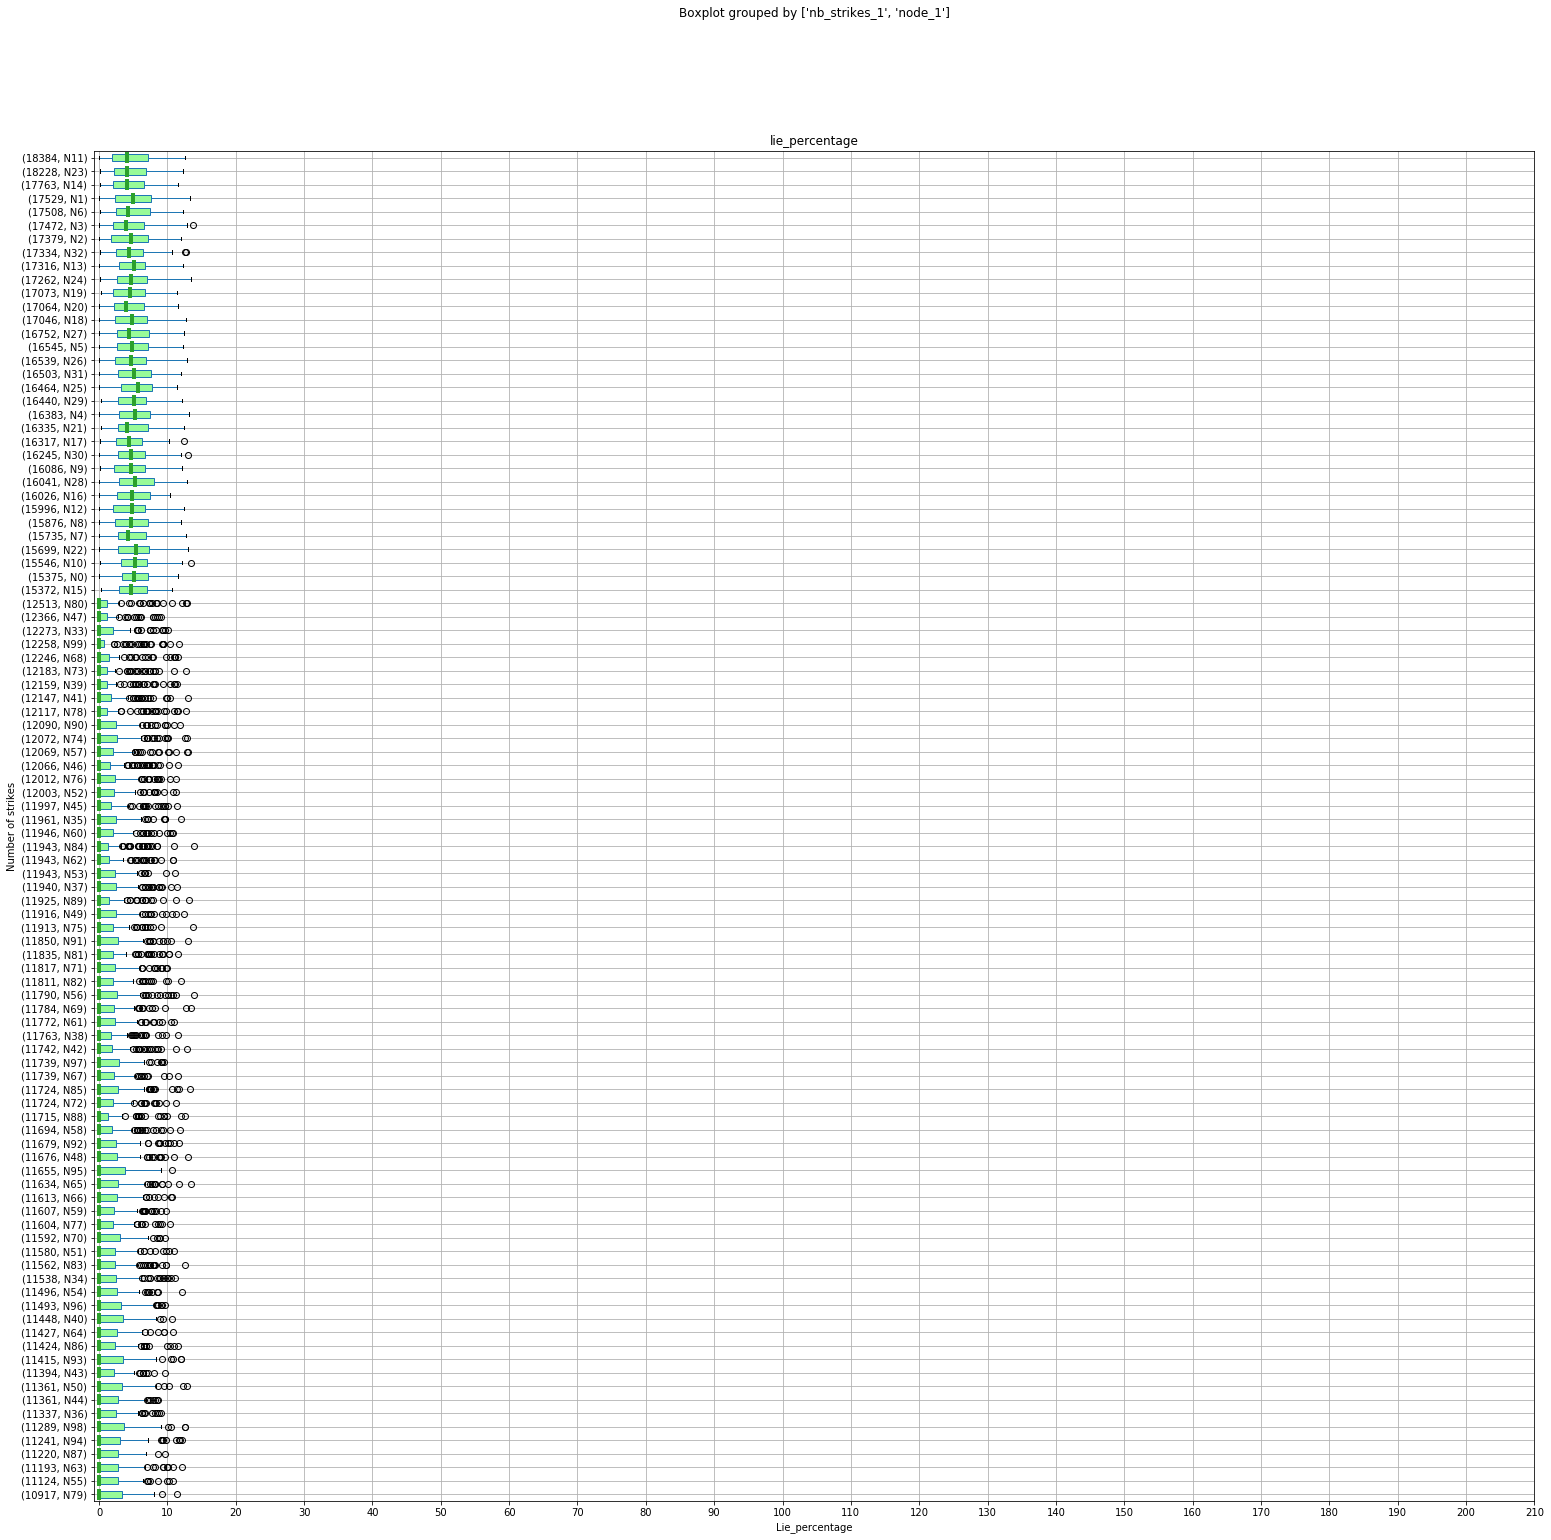

In [8]:
plt.figure()

percentages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]

medianprops = dict(linestyle='-', linewidth=4, color='blue')

size = 25
if N == "200":
    size = 50

bp = pd.DataFrame.boxplot( data,
    column="lie_percentage",
    by=["nb_strikes_1", "node_1"], 
    figsize=(size, size), 
    vert=False, 
    medianprops=medianprops,
    return_type='both', 
    patch_artist = True)
    
colors = ['salmon', 'palegreen']
for row_key, (ax,row) in bp.iteritems():
    ax.set_xticks(percentages)
    ax.set_xlabel('Lie_percentage')
    ax.set_ylabel('Number of strikes')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[nb_strikes[i] < threshold ])
        

#ax.set_yticks(np.arange(0, 100, step=500))

In [9]:
fig = ax.get_figure()
